In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import xarray as xr
import cartopy as cart
import cartopy.crs as ccrs
import cmocean
import numpy as np
from glob import glob

import sys
sys.path.append('/science/users/4302001/arctic-connectivity/tools')
sys.path.append('/Users/daanreijnders/surfdrive/Thesis/repository/tools')
import plot
import community
import fieldsetter_cmems
import advectParticles

Stripy is not available on this machine.


In [2]:
readDir = "/data/oceanparcels/input_data/CMEMS/GLOBAL_REANALYSIS_PHY_001_030/"
meanDir = "/data/oceanparcels/input_data/CMEMS/GLOBAL_REANALYSIS_PHY_001_030_monthly/"
fieldFiles = sorted(glob(readDir + "mercatorglorys12v1_gl12_mean_20180101*.nc"))
ds = xr.open_dataset(fieldFiles[0])

In [3]:
ds.time

<xarray.DataArray 'time' (time: 1)>
array(['2018-01-01T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01T12:00:00
Attributes:
    long_name:      Time (hours since 1950-01-01)
    standard_name:  time
    axis:           T
    valid_max:      596100.0
    valid_min:      596100.0

In [4]:
speed = np.sqrt(ds.uo.data[0, 0, 1620:, :]**2+ds.vo.data[0, 0, 1620:, :]**2)

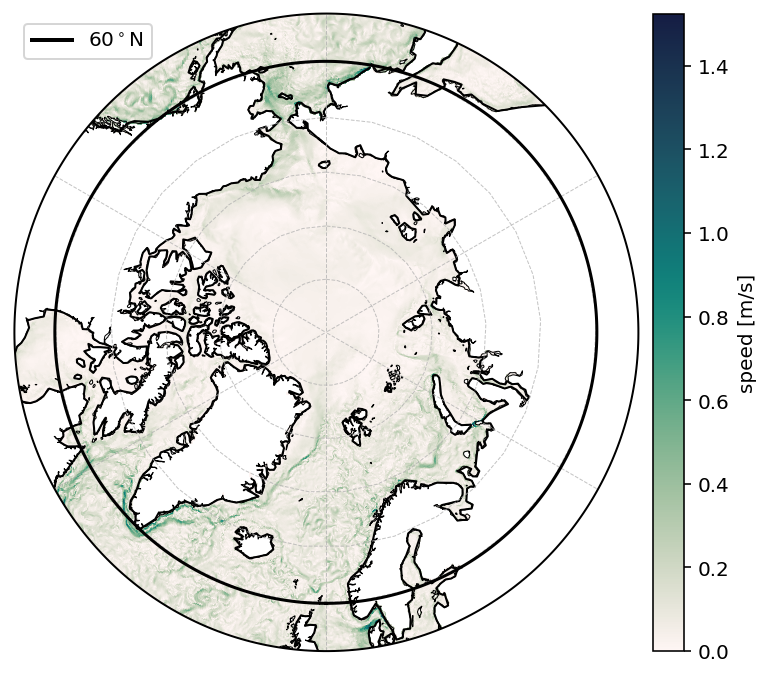

In [18]:
fig, ax = plot.field_from_dataset(ds.longitude, 
                                  ds.latitude[1620:],
                                  speed, 
                                  latRange=(55,90), 
                                  size=(6,6), 
                                  polar=True, 
                                  colormap=cmocean.cm.tempo,
                                  land=False,
                                  units='speed [m/s]')
north = ax.plot(np.linspace(0,360, 1000), 
                60*np.ones(1000), 
                zorder=15, 
                transform=ccrs.PlateCarree(), 
                color='black')
custom_lines = [Line2D([0], [0], color='black', lw=2)]
ax.legend(custom_lines, [r'$60^\circ$N'], loc="upper left")
ax.coastlines(resolution='50m', linewidth=0.5)
plt.savefig('domain.png', dpi=300, bbox_inches = 'tight', pad_inches = 0.1)